### Indian Airlines Ticket Price Analysis
- Defining the problem statement
- Collecting the data
- Exploratory data analysis

#### 1) Defining the problem statment
- In this project, we study the data which is in tabular format using various Python libraries like Pandas, Numpy, Matplotlib and Seaborn.

- We study different columns of the table and try to co-relate them with others and find a relation between those two.

- We try to find and analyze those key factors like class of travel, duration of fight, etc. which helps us understand the pricing of tickets to plan and schedule our air travel in efficient way

#### About the dataset:

The various features of the dataset are explained below:

- Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
- Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
- Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
- Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
- Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
- Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
- Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
- Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
- Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
- Price: Target variable stores information of the ticket price.

#### Loading the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, display
from pylab import rcParams

from warnings import filterwarnings
filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import zscore

#### Importing the dataset

In [4]:
df = pd.read_csv('C:\Data Science\Resume_Projects/Indian Airlines.csv')

#### Checking first five rows of the dataset

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### Checking last five rows of the dataset

In [6]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


#### Checking shape of the datset

In [7]:
index = ['Number of rows', 'Number of columns']
pd.DataFrame(df.shape, columns = ['shape of dataset'], index = index)

,shape of dataset
Number of rows,300153
Number of columns,11


#### Checking the datatypes of Attributes in a dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


#### Checking Descriptive statistics of the dataset

In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.describe(include = [object])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


#### Checking for Missing values in a dataset

In [11]:
pd.DataFrame(df.isnull().sum(), columns = ['Null values'])

,Null values
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


#### Checking for duplicate values in a dataset

In [12]:
dup = df.duplicated()
print('Number of duplicate values:', dup.sum())
df[dup]

Number of duplicate values: 0


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


#### Checking unique values in all categorical variables

In [24]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


#### About the columns:
- In airline column there are 6 unique airlines: SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India
- In source_city & destination_city there are 6 unique cities: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai
- In arrival & departure columns there are 6 different timings: Night, Morning, Early_Morning, Afternoon, Evening, Late_Night
- In class column there are 2 different classes: Economy, Business

### Performing EDA

#### Checking number of flights operated by each airline?

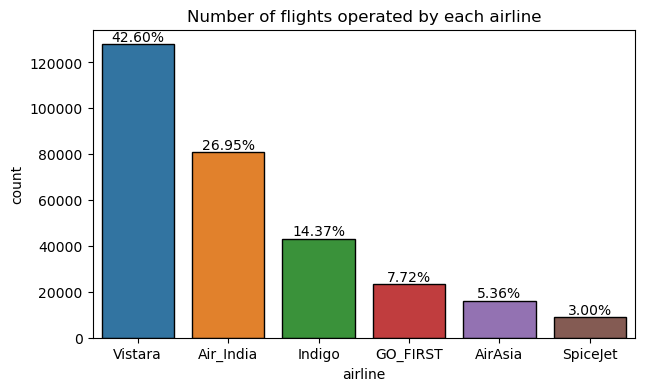

In [35]:
plt.figure(figsize = (7,4))
ax = sns.countplot(data=df, x = 'airline', edgecolor='black', linewidth=1, order = df['airline'].value_counts().index)
total = df['airline'].count()
for c in ax.containers:
    ax.bar_label(c, fmt = lambda x: f'{(x/total)*100:0.2f}%')
plt.title('Number of flights operated by each airline');

From the above figure, we can see 'Vistara' has maximum no. of fights followed by 'Air India' while 'Spice Jet' has least no. of flights

#### Checking price range according to class of travel?

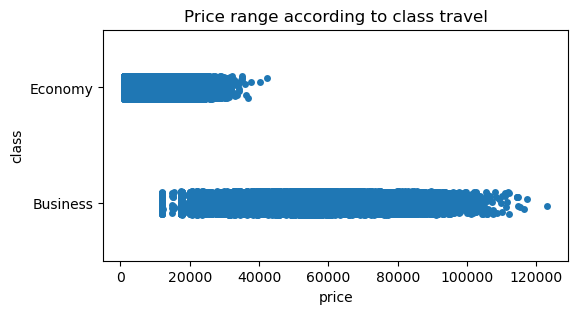

In [44]:
plt.figure(figsize = (6,3))
sns.stripplot(data=df, x = 'price', y = 'class', jitter=True)
plt.title('Price range according to class travel');

From the above figure
- we can see 'Economy' class tickets usually cost between 2500 - 22500 while 'Business' class tickets usually cost between 25000 - 95000

#### Checking availability of Tickets according to class of travel

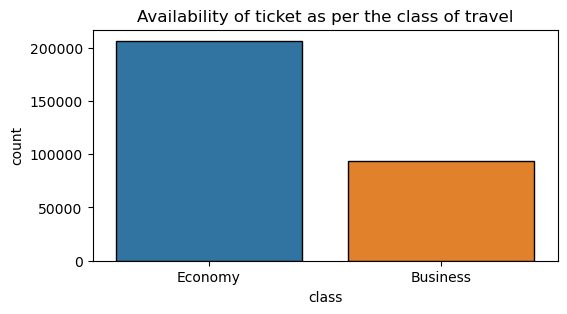

In [47]:
plt.figure(figsize = (6,3))
sns.countplot(data=df, x = 'class', edgecolor='black', linewidth=1)
plt.title('Availability of ticket as per the class of travel');

From the above figure
- we can see that availabilty of 'Economy' tickets is almost twice than availibitly of 'Business' class tickets which is explained by the fact that only 2 airlines - 'Air India, Vistara' offer 'Business' class tickets while all airlines offer 'Economy' class tickets

#### Checking price of ticket for different airlines based on duration of flight

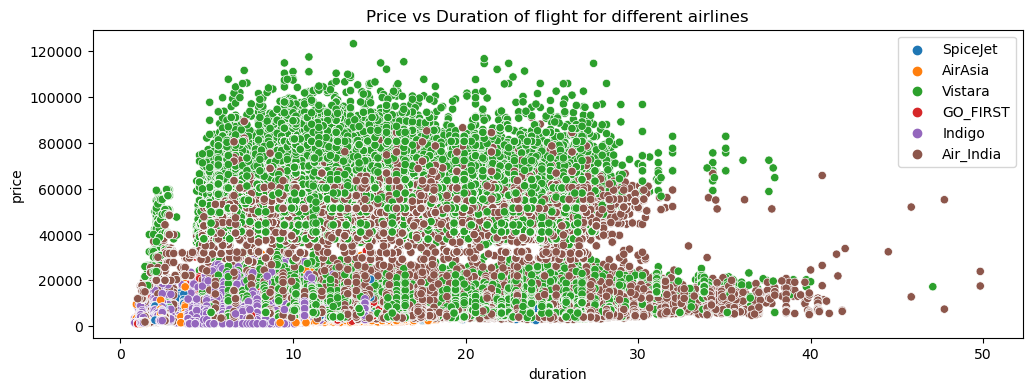

In [51]:
plt.figure(figsize = (12,4))
sns.scatterplot(data=df, x = 'duration', y = 'price', hue = 'airline')
plt.legend(bbox_to_anchor=[1,1])
plt.title('Price vs Duration of flight for different airlines');

From the above figure
- we see the distribution of ticket price varying with duration of flight. More no. of green and brown points in the figure is explained by the fact that 'Vistara' and 'Air India' have maximum no. of flights.

#### Checking how ticket prices vary across different airlines and class of travel

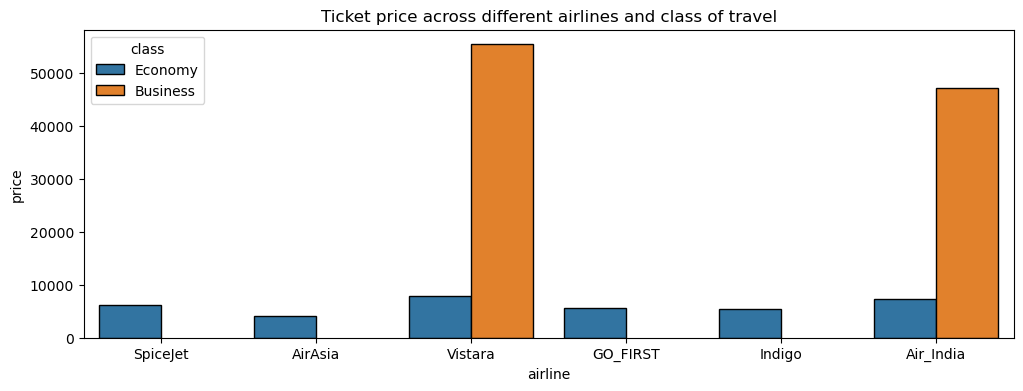

In [70]:
plt.figure(figsize = (12,4))
sns.barplot(data=df, x = 'airline', y = 'price', hue = 'class', ci=False, edgecolor='black', linewidth=1)
plt.title('Ticket price across different airlines and class of travel');

In [56]:
df.groupby(['airline'])['price'].mean().sort_values(ascending=False)

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

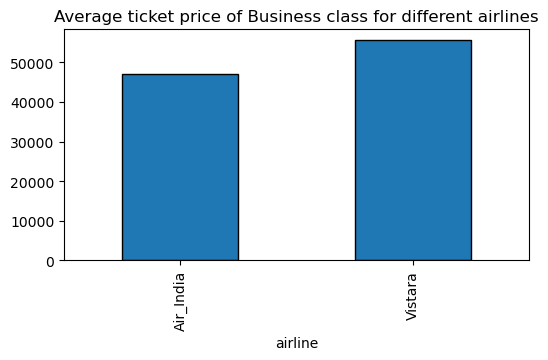

In [69]:
df[df['class'] == 'Business'].groupby(['airline'])['price'].mean().plot(kind='bar', figsize = (6,3), edgecolor='black',
                                                                       linewidth=1)
plt.title('Average ticket price of Business class for different airlines');

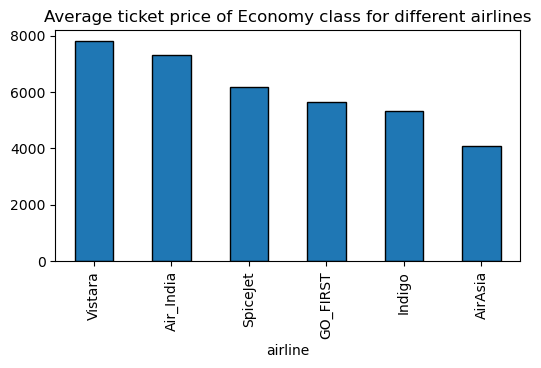

In [66]:
df[df['class'] == 'Economy'].groupby(['airline'])['price'].mean().sort_values(ascending=False).plot(kind='bar', figsize = (6,3),
                                                                                                   edgecolor='black', linewidth=1)
plt.title('Average ticket price of Economy class for different airlines');

From the above figures
- We can conclude that 'Air Asia' offers the cheapest 'Economy' class tickets while 'Indigo, 'Go First', 'Spice Jet' are almost similarly priced. 
- Meanwhile 'Air India' and 'Vistara' are priced much higher than other 4 airlines which can be explained on the basis that 'Air India' and 'Vistara' are both FSCs while rest are LCCs. 
- 'Business' class tickets for 'Vistara' cost much higher than 'Air India' which can be due to better service, quality of seats available on 'Vistara' as compared to 'Air India'

#### Checking how airline ticket prices vary depending on when you buy them

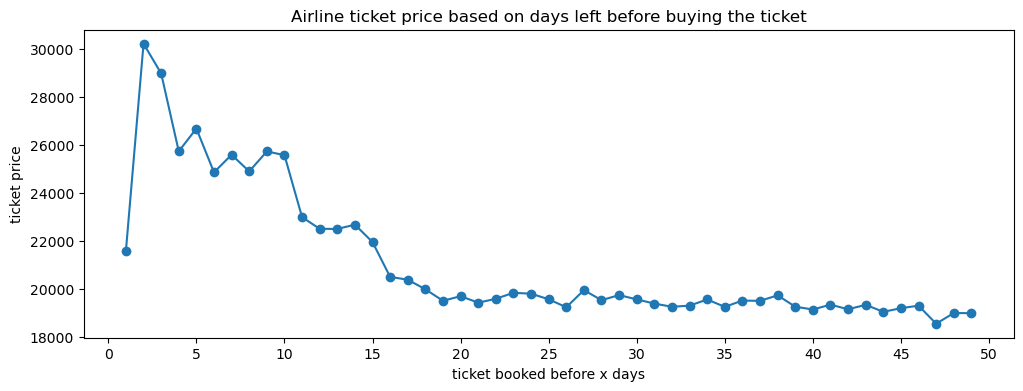

In [92]:
df.groupby(['days_left'])['price'].mean().plot(kind='line', figsize = (12,4), marker = 'o')
plt.xticks(np.arange(0,51,5))
plt.title('Airline ticket price based on days left before buying the ticket')
plt.ylabel('ticket price')
plt.xlabel('ticket booked before x days');

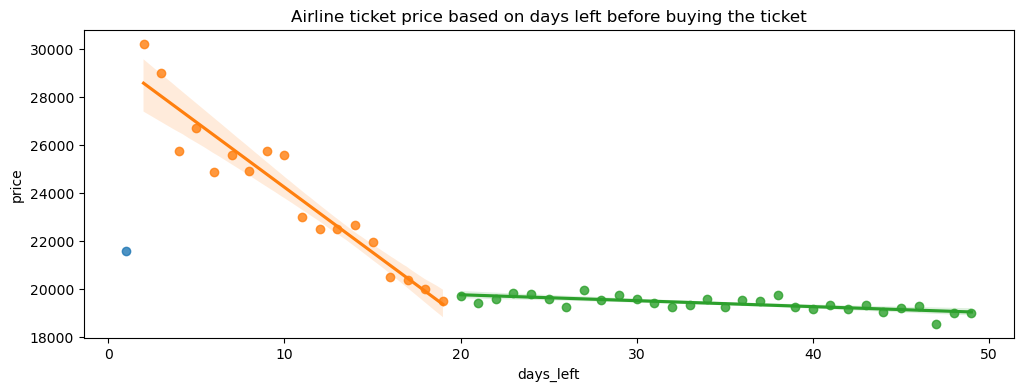

In [112]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize = (12,4))
ax = plt.axes()
sns.regplot(data=df_temp, x = df_temp.loc[df_temp['days_left']==1]['days_left'], 
            y = df_temp.loc[df_temp['days_left']==1]['price'], fit_reg=False, ax=ax)

sns.regplot(data=df_temp, x = df_temp.loc[(df_temp['days_left']>1) & (df_temp['days_left']<20)]['days_left'],
            y = df_temp.loc[(df_temp['days_left']>1) & (df_temp['days_left']<20)]['price'], fit_reg=True, ax=ax)

sns.regplot(data=df_temp, x = df_temp.loc[df_temp['days_left']>=20]['days_left'], 
           y = df_temp.loc[df_temp['days_left']>=20]['price'], fit_reg=True, ax=ax)
plt.title('Airline ticket price based on days left before buying the ticket');

In [90]:
df.groupby(['days_left'])['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

From the above figure and table
- We can conclude that ticket price rise slowly before 20 days from the date of flight, then rise sharply till the last day, while dramatically reducing just 1 day before the date of flight. This can be explained by the fact that people usually buy flight tickets within 2-3 weeks of flight which generates more profits for airlines. On last day, prices show dramatic reduction as airlines hope to fill the flight completely due to increase the load factor and decrease the operational cost per passenger

#### Checking how does price of ticket vary depending on duration of flight

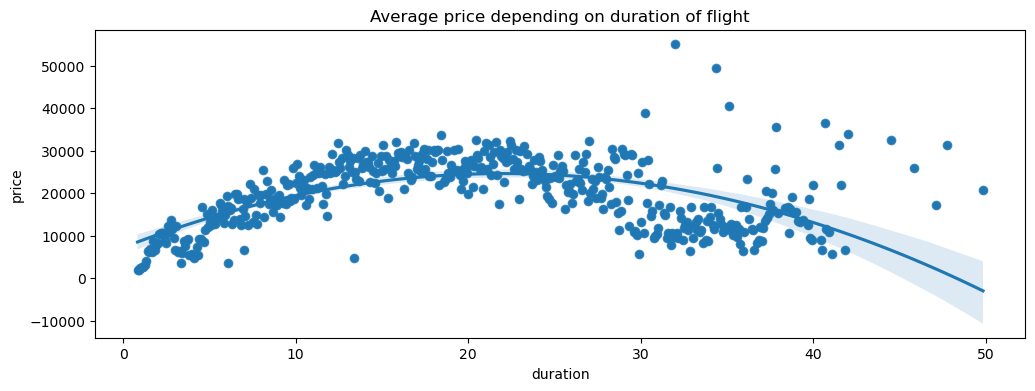

In [118]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize = (12,4))
sns.scatterplot(data=df_temp2, x = 'duration', y = 'price')
sns.regplot(data=df_temp2, x = 'duration', y = 'price', order=2)
plt.title('Average price depending on duration of flight');

From the above figure
- We can see that the relationship is not linear but can be approximated by second degree curve. We can see linear growth in prices as duration of flight increases till 20 and then lowering again. Some outliers may be affecting the curve

#### Checking how does ticket price vary according to departure time and arrival time

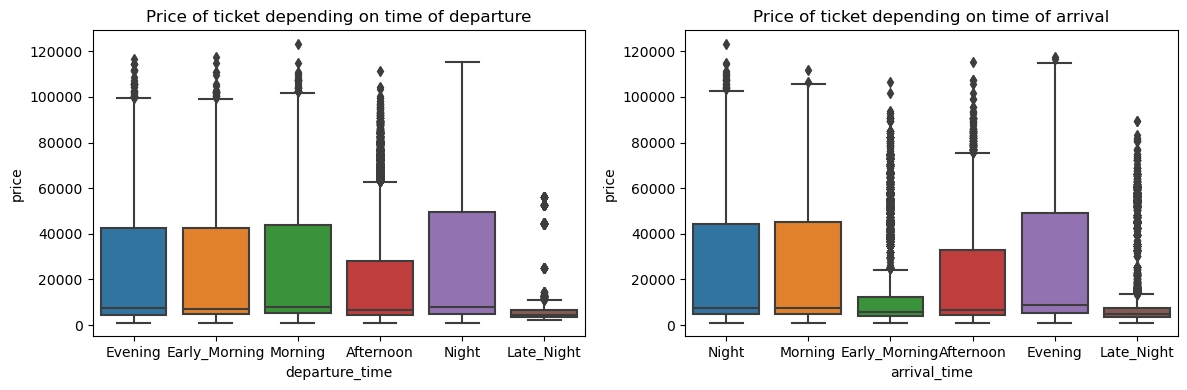

In [126]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x = 'departure_time', y = 'price').set_title('Price of ticket depending on time of departure')
plt.subplot(1,2,2)
sns.boxplot(data=df, x = 'arrival_time', y = 'price').set_title('Price of ticket depending on time of arrival')
plt.tight_layout();

From the above figure
- We can conclude that flights departing late at night are cheapest while those arriving early morning and late night are cheap too. Flights departung in afternoon are relatively cheap as well.

In [130]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

#### Checking how does ticket price vary depending on source and destination

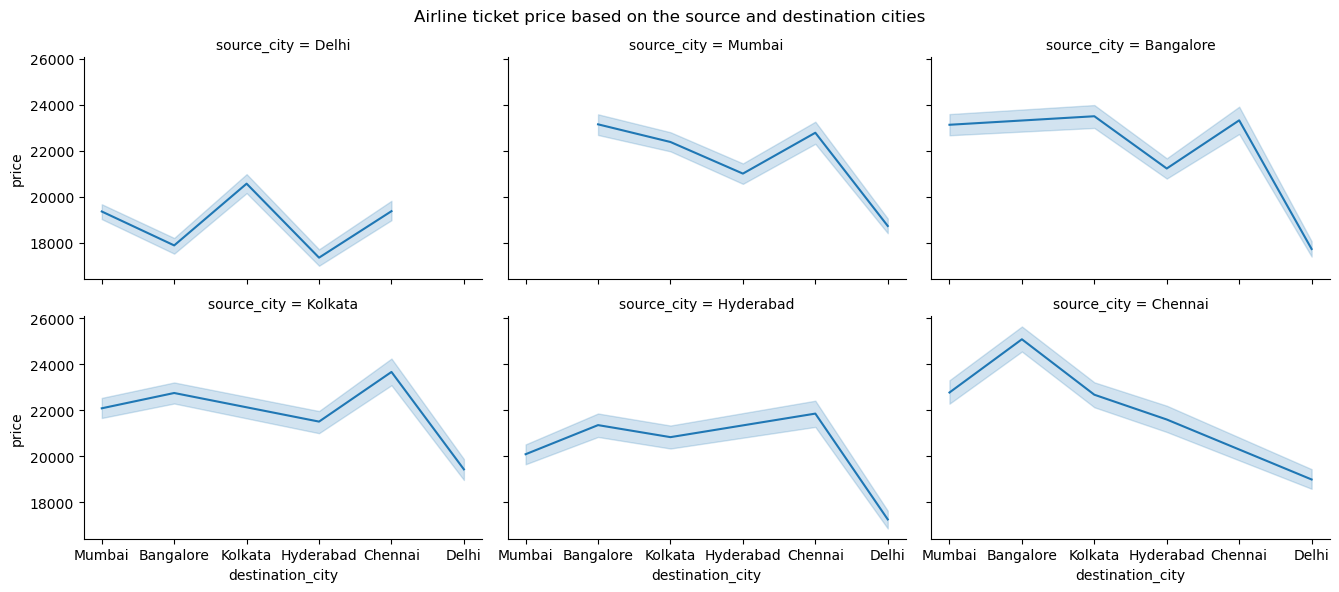

In [142]:
g = sns.FacetGrid(data=df, col = 'source_city', col_wrap=3, height=3, aspect = 1.5)
g.map(sns.lineplot, 'destination_city', 'price')
g.fig.subplots_adjust(top=0.9) # Adjusts the top margin of the grid to make space for the title.
g.fig.suptitle('Airline ticket price based on the source and destination cities'); # Adds a title to the entire figure.

From the above figure
- We can conclude that flight departing from Delhi are usually cheaper which can be explained by the fact that Delhi being capital has very strong connectivity with every other city and more no. of frequencies resulting in cheaper ticket prices.
- Chennai-Bangalore seems to be the most expensive route to fly while Hyderabad is most expensive city to fly

In [146]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

#### Checking how does price of tickets vary based on no. of stops and airline

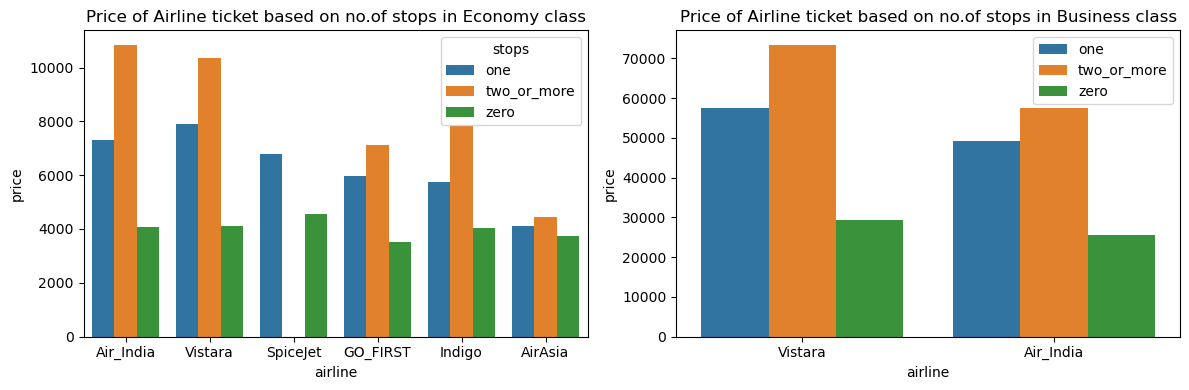

In [153]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot(data=df.loc[df['class'] == 'Economy'].sort_values('price',ascending=False), x = 'airline', y = 'price', 
            hue = 'stops', ci=False).set_title('Price of Airline ticket based on no.of stops in Economy class')
plt.subplot(1,2,2)
sns.barplot(data=df.loc[df['class'] == 'Business'].sort_values('price',ascending=False), x = 'airline', y = 'price',
           hue = 'stops', ci=False).set_title('Price of Airline ticket based on no.of stops in Business class')
plt.legend(bbox_to_anchor=[1,1])
plt.tight_layout();

From the above figure
- We can conclude that Non-Stop flights are generally the cheapest while One-Stop flights are more expensive and 2+ stop flights are most expensive which can be explained on basis that as one undertakes more flights to fly to destination, it costs more.
- 'Air Asia' seems to be an exception in this case which shows little variation in prices between its Non-Stop, One Stop and 2+ Stop flights